# <u> Creation of a Petroleum Database

Make sure Python and pip are installed. Install all packages listed below. Import all programs used for the creation of the database. 

In [1]:
import pubchempy as pub
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit import DataStructs
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
import numpy as np
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.rdMolDescriptors import CalcMolFormula
from mordred import AtomCount as atomcount
import collections as c
import matplotlib
import matplotlib.pyplot as plt
import rdkit.Chem.Crippen as crip
from rdkit.Chem import rdPartialCharges
from rdkit.Chem import rdqueries
from rdkit.Chem import rdEHTTools
import pymysql
import statistics
import pandas as pd

Molecules found in three papers are inserted into a database using the following workflow. 

The papers are cited, here:

Paper 1, dataset SCT28: Zhang, Y.; Schuler, B.; Fatayer, S.; Gross, L.; Harper, M. R.; Kushnerick, J. D. Understanding the Effects of Sample Preparation on the Chemical Structures of Petroleum Imaged with Noncontact Atomic Force Microscopy. Industrial & Engineering Chemistry Research 2018, 57 (46), 15935-15941. DOI: 10.1021/acs.iecr.8b03962.

Paper 2, dataset CA12: Schuler, B.; Meyer, G.; Peña, D.; Mullins, O. C.; Gross, L. Unraveling the Molecular Structures of Asphaltenes by Atomic Force Microscopy. Journal of the American Chemical Society 2015, 137 (31), 9870-9876. DOI: 10.1021/jacs.5b04056.

Paper 3, dataset P26: Chen, P.; Metz, J. N.; Mennito, A. S.; Merchant, S.; Smith, S. E.; Siskin, M.; Rucker, S. P.; Dankworth, D. C.; Kushnerick, J. D.; Yao, N.; et al. Petroleum pitch: Exploring a 50-year structure puzzle with real-space molecular imaging. Carbon 2020, 161, 456-465. DOI: https://doi.org/10.1016/j.carbon.2020.01.062.

## SMILES strings for each dataset 

In [14]:
smiles={
    'SCT1':'CC1=C(C=CC2=C3C=CC=C2)C3=C4C5=C1C=CC(C5=C6S4)=CC7=C6C8=C(C=C7)C9=CC%10=CC=CC=C%10C%11=C9C8=CC=C%11',
    'SCT2':'CC1=C2C(C3=C(C4=C5C=C6)C6=C2)=C(C=CC3=CC4=CC=C5)C=C1',
    'SCT3':'CC1=C2C(C(C=CC3=C4C5=C6C7=C3C=CC=C7C=C(C)C6=CC=C5)=C4S2)=CC=C1',
    'SCT4':'CC1=CC2=C(C=C1)C3=C(C=CC=C3)C4=CC=CC=C42',
    'SCT5':'CC1=CC2=CC=C3C4=C2C(C5=CC4=CC=C3)=C1NC(C5=C6)=C7C=CC8=CC=CC9=C8C7=C6C=C9',
    'SCT6':'C12=CC(C=CC3=C4C(C5=C6)=C(C(C=C5)=CC=C7)C7=C3)=C4C6=C1C=CC=C2',
    'SCT7':'CC1=CC=CC2=C1CC3=CC(C)=CC=C32',
    'SCT8':'O=C1C2=CC=CC3=C2C4=C(C=C3)C=CC5=C4C1=C6C(C(C)=CC=C6)=C5',
    'SCT9':'CC1=CC2=C3C(C4=C5C(C6=CC=CC=C6C7=C5C3=C1N7)=CC=C4)=CC=C2',
    'SCT10':'CC(C1=C2C3=CC4=C(C=CC=C4)C(C)=C3C=C1)=CC5=C2C=C6C(C=CC=C6)=C5',
    'SCT11':'CC1=C2C(C=C(C(C3=C4C5=C6C=C7C(C=CC=C7)=C5C=CC4=CC=C3)=C6S8)C8=C2)=C(C)C=C1',
    'SCT12':'CC1=C2C3=C(C=C1)C4=CC=CC5=C4C(C3=C(C2)C=C6)=C6C=C5',
    'SCT13':'CC1=C(C=CC=C2)C2=CC3=C1C=CC4=CC5=C(C(C=CC=C6)=C6C5)C=C43',
    'SCT14':'CC1=CC(C)=CC2=CC(C)=CC=C21',
    'SCT15':'CC1=C2C(C=C(C=C3C4=C5C=CC=C4C6=C3C=C(C7=CC=C(C=C(C)C=C8)C8=C7)C=C6)C5=C2)=CC=C1',
    'SCT16':'C12=CC3=CC(CC4)=C(C4=C(C=C(CCC5)C5=C6)C6=C7)C7=C3C=C1C=CC=C2',
    'SCT17':'CC1=CC=CC2=C1SC3=C2C=CC4=C3C5=CC=CC(C)=C5C4',
    'SCT18':'CC1=CC=CC2=C1CC3=C2C=C4C5=C(C(C)=CC=C5)C=C6C4=C3C7=C6C=C8C(C9=C%10C8=CC=C%11C%10=C(SC%12=C%11C=CC=C%12C)C=C9)=C7C',
    'SCT19':'CC1=C(C)C=C2C(C=CC=C2C)=C1',
    'SCT20':'CC1=CC2=C3C4=C5C6=C2C(C1=C(C)C=C7)=C7C8=CC9=C(C(C%10=C5SC4=CC=C3)=C86)C%11=C(C%10=CC=C%12C)C%12=CC%13=C%11C(C9=CC=C%14)=C%14C=C%13',
    'SCT21':'CC(C=C1)=CC2=C1C3=C(C2)C(C)=C4C5=C(C6=C4C=C7C(C(C)=CC=C7)=C6)C=CC=C35',
    'SCT22':'CC1=C(C)C2=CC3=C4C(C=C(C)C=C4)=CC(CC5)=C3C5=C2C=C1C',
    'SCT23': 'CC1C2=CC3=C(C(C=CC(C)=C4)=C4C3)C5=C2C6=C(C=C(C(C)=CC(C7=C8C9=C(C=CC(C)=C9)C%10=C7C=CC=C%10)=C%11C8=O)C%11=C6C5)C1',
    'SCT24':'CC1=C(C)C=C(C)C=C1',
    'SCT25':'CC1=CC=C(C=C2)C(C3=C2C4=C(C3)C(C)=C5C(C(C=C(C=C(C)C(C)=C6)C6=C7)=C7C5)=C4)=C1',
    'SCT26':'CC1=CC2=C(C3=C1CC4=C3C=C(C=CC5=C6C=C7C(CCC7)=C5)C6=C4)C=CC8=C2C=CC=C8',
    'SCT27':'CC1=CC=CC2=C1SC3=C2C=C4C(C5=CC=C4)=C3C=C6C5=CC(C7=C6)=C(C=C8)C9=C7C=CC%10=CC=CC8=C%109',
    'SCT28':'CC1=C(C=CC2=C3C=CC4=C2SC=C4)C3=CC(C)=C1C',
    'CA1':'CC1=CC2=C(C3=C4C(C=CC5=C4C2=CC=C5)=CC6=C3C7=C(C=CC=C78)C=C6)C8=C1',
    'CA2':'CC1=CC2=C(C=C1)C3=C(C4=CC5=C3C=CC=C5)C(C6=CC(C=CC7=CC=CC(C=C8)=C79)=C9C8=C64)=C2', 
    'CA6':'C1(C2=C3C(C4=C(C5=C6C=C7)C(C8=C9C%10=C%11C=CC%12=C%10C%13=C(C=CC=C%13C%14=CC=CC=C%14%12)C9=CC%15=C8C5=C7C=C%15)=C%11C=C4%16)=C6C=C2)=C(C%17=C3C%16=CC=C%17C=C%18)C%18=CC=C1', 
    'CA7':'CC1=CC2=C(C3=C(C(C4=CC=CC5=C4C6=CC=C5)=CC7=C3C8=C2C=CC=C8C=C7)C6=C9)C9=C1',
    'CA9':'CC1=CC2=C(C3=C4C=C2)C(C5=CC=CC6=C5C3=C7C(C=CC8=CC=CC4=C78)=C6)=C1',
    'CA13':'C1(C2=CC=CC3=C2C(C4=C5C(C(C=CC=C6C7=CC=CC=C87)=C6C8=C5)=C9)=C9C=C3)=C4C=CC=C1',
    'CA14 ':'CC1=C2C=CC3=CC4=C(C5=C3C2=C(C(C=C6)=C1)C7=C6C=CC8=C57)C(C8=CC=C9)=C9C=C4',
    'CA15':'C12=CC(C3=CC4=C(CC5=C6C=CC7=C5C=CC=C7)C6=C8C9=C4C%10=C3C%11=C%12C=CC=C%11C=C%10C=C9C%13=CC%14=C(C(C=CC=C%15)=C%15C=C%14)C=C8%13)=C%12C=C1C=CC=C2',
    'CA16':'C1(C=CC2=C3C=CC4=C2C(C=C(C(C=C(C5=CC6=C(C(C(C=C7)=CC=C8)=C8C=C6)C7=C5)C=C9)=C9C=C%10)C%10=C%11)=C%11C4)=C3C=CC=C1',
    'CA21':'C12=CC=CC3=C1C4=C(C(C=CC=C5)=C5C=C4C3)C=C2',
    'CA22':'C12=C(C(C(C(C=C3)=C2)=C(C3=CC4=C5C=CC=C4)C5=C6)=C6C=C7)C7=CC=C1',
    'CA23':'CC1=CC=C2C(C(CC3=C4C=C(C5=CC=C(C)C=C5)C=C3)=C4C2)=C1',
    'P1':'O=C1C2=C(C=CC(C)=C2)C3=C1C(C4)=C(C=C3)C5=C4C=CC=C5',
    'P2':'CC1=CC(C2=C3C(C4=C(C)C=C5)=C5C=CC3=CC=C2)=C4C=C1C',
    'P3':'CC1=CC2=CC=C3C(C4=C5C=C3C)=C2C(C6=C4C(C=C5)=CC=C6)=C1',
        'P5':'C1(C2=CC(C=C3C4=C5C=CC=C4CC3)=C5C=C2C6=C7C=CC=C6)=C7C=CC=C1',
    'P6':'CC1=CC2=C(C=CC3=C2C=CC4=C3C=C(CC)C=C4)C=C1',
    'P7':'CC1=CC2=CC(C(C=CC=C3)=C3C4=C5C=CC=C4)=C5C=C2C=C1',
    'P8':'CCC1=CC(C(C=CC=C2)=C2C=C3)=C3C4=C1C=CC=C4',
    'P9':'CC(C1=CC=C2)=CC3=C(C1=C2C=C4)C4=CC=C3',
    'P10':'C12=CC=CC=C1CC3=C2C=C(C=C4)C5=C3CC6=C5C4=CC=C6',
    'P11':'CC(CCCC)C1=CC2=C(C3=C(C=C4)C=CC=C3C=C2)C4=C1',
    'P12':'C12=CC3=C(CCC4)C4=C(C=C(CCC5)C5=C6)C6=C3C=C1C=CC=C2',
    'P13':'CC1=C2C3=C(C=C1)C=CC(C3=C4C=C2)=CC5=C4C=C(C)C=C5',
    'P14':'CC1=C2C(C=C(C(C=C3)=C2)C4=C3C5=C(C=C4C)C=C(C6=C5)C7=C8C(C=CC9=CC=CC6=C89)=CC(C)=C7)=CC=C1',
    'P16':'C12=CC=CC3=C1C4=C(C=CC(CCCC5=C6C7=C(C=CC8=CC=CC(C=C6)=C87)C=C5)=C4C=C3)C=C2',
    'P17':'C1(C2=C34)=CC=CC2=CC=C4C=CC(C5=C6C(C7=C8C=CC=C7C=C6)=C(C=C8)C=C5)=C3C=C1',
    'P18 ':'CC1=CC=C2C=C(C3=CC2=C1)C=CC4=C3C=C5C(C=C6C=CC=CC6=C5)=C4',
    'P19':'CC1=CC=C2C(C=C(C=C3)C4=C2C=CC5=C4C3=C(C6=CC(C=CC=C7)=C7C8=CC(C9=CC(C)C(C)=C9)=CC%10=C68)C%10=C5)=C1',
    'P20': 'CC(C=C1)=CC2=C1C=CC3=C2CC4=C3C(C=C5)=C(C=C4)C6=C5C7=C8C(C9=C%10C=CC=C9C=C8)=C(C=C7C6)C%11=C%10C(C(C)=C%12)=C(C=C%11)C%13=C%12C%14=CC%15=C(C=C%14C=C%13)C%16=CC=CC=C%16C=C%15C',
    'P21':'CC1=CC2=CC=CC(CC3=CC=C(C(C=CC4=C5C=CC(C)=C4)=C5C=C6)C6=C3)=C2C=C1',
    'P22':'CCC1=CC2=C(C=C1)C3=C(C=CC=C3)C4=C2C=CC=C4',
    'P23':'CCC1=CC2=C(C=C1)C3=C(C2=CC4=CC=C5)C(C4=C5C=C6)=C6C7=C8C(C=C73)=CC9=CC=CC%10=CC=CC8=C9%10',
    'P24':'CC1=CC2=C3C4=C(C=C2)C=CC5=C4C(C6=CC(C(C=C(C)C=C7)=C7C8=CC(C)=CC=C89)=C9C6=C5)=CC3=C1',
    'P26':'C1(C=C(C=C2)C3=C4C2=CC=CC4=CC=C35)=C5C=CC=C1',
    'P28':'CC1=CC=C(C=CC2=C3C=CC(CCC4=CC=C5C(C=C(CC)C6=C5C=C(C)C=C6)=C4)=C2)C3=C1',
    'P29':'CC1=CC2=C3C4=C1C=C5C(C4C6=CC3=CC=C2)C(C=C6)=CC=C5',
    'P30':'CCC1=CC2=CC(C=CC3=C4C(C(C=C4)=CC=C5)=C5C=C36)=C6C=C2C=C1'
}


In [29]:
print("The number of molecules from SCT28:", len(smile_list_SCT28))
print("The number of molecules from CA12:", len(smile_list_CA12))
print("The number of molecules from P26:", len(smile_list_P26))
print("Total number of molecules in database:", len(all_smiles))

The number of molecules from SCT28: 28
The number of molecules from CA12: 12
The number of molecules from P26: 26
Total number of molecules in database: 66


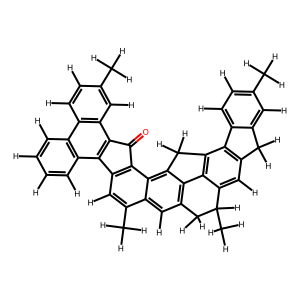

In [15]:
mol_noH = Chem.MolFromSmiles(smiles['SCT23'])
molwithH = Chem.AddHs(mol_noH)
from rdkit.Chem import Draw
img = Draw.MolToImage(molwithH)
img

## PubChem database search 

In [5]:
#  Search pubchem for PubChem ID's for each asphaltene and store information in a dictionary
def retrieve_pubchem_ids(smiles):
    pubchem_ids_dict = {}
    for key in smiles.keys():
        try:
            smi=smiles[key]
            compounds = pub.get_compounds(smi, namespace='smiles')
            if compounds:
                match = compounds[0]
                if match.cid is not None:
                    pubchem_ids_dict[key] = match.cid
        except pub.PubChemHTTPError:
            print(f"No PubChem data found for SMILES: {smi}")
    return pubchem_ids_dict

pubchem_ids_dict = retrieve_pubchem_ids(smiles)

#  Print the dictionary
for identifier, pubchem_id in pubchem_ids_dict.items():
    print(f"Identifier: {identifier}, PubChem Compound ID: {pubchem_id}")

No PubChem data found for SMILES: CC1C2=CC3=C(C(C=CC(C)=C4)=C4C3)C5=C2C6=C(C=C(C(C)=CC(C7=C8C9=C(C=CC(C)=C91C%10=C7C=CC=C%10)=C%11C8=O)C%11=C6C5)C1
Identifier: SCT1, PubChem Compound ID: 164942196
Identifier: SCT2, PubChem Compound ID: 14274984
Identifier: SCT4, PubChem Compound ID: 618051
Identifier: SCT6, PubChem Compound ID: 15820911
Identifier: SCT7, PubChem Compound ID: 12310194
Identifier: SCT14, PubChem Compound ID: 18197
Identifier: SCT19, PubChem Compound ID: 16732
Identifier: SCT24, PubChem Compound ID: 7247
Identifier: CA1, PubChem Compound ID: 122214794
Identifier: CA2, PubChem Compound ID: 122214791
Identifier: CA6, PubChem Compound ID: 122214795
Identifier: CA7, PubChem Compound ID: 122214792
Identifier: CA13, PubChem Compound ID: 122214798
Identifier: CA14 , PubChem Compound ID: 122214797
Identifier: CA21, PubChem Compound ID: 67458
Identifier: CA22, PubChem Compound ID: 15820911
Identifier: P6, PubChem Compound ID: 15933535
Identifier: P8, PubChem Compound ID: 75951
Ide

## Create lists of properties obtained from the RDKit 

In [24]:
mw = {}
formula = {}
mol_withH = {}
logP={}
nC={}
DBE={}
Z={}
for key in smiles.keys():
    smi=smiles[key]
    #print(key,' ',smi)
    mol_noH = Chem.MolFromSmiles(smi)
    mol = Chem.AddHs(mol_noH)
    mol_withH[key]=mol
    mass = Descriptors.MolWt(mol)
    mw[key]=mass
    #molecular formula list
    form = CalcMolFormula(mol)
    formula[key]=form

    #  number of H, C, and N
    comp = c.defaultdict(lambda:0)
    for atom in mol.GetAtoms():
        comp[atom.GetSymbol()] +=1
    numH=comp['H']
    numC=comp['C']
    numN=comp['N']
    nC[key]=numC
   
    #  LogP
    logP_value = crip.MolLogP(mol)
    logP[key]=logP_value

    #  DBE 
    #  where DBE = C - H/2 + N/2 + 1 
    #  and gives a measure of aromaticity
    DBE_val = numC - (numH / 2) + (numN / 2) + 1
    DBE[key]=DBE_val

    #  Z
    #  where Z = H - 2C
    #  and gives a measure of aromaticity
    Zval = numH - (2 * numC)
    Z[key]=Zval      


## Lipinski's Rule of Five

This will tell if a molecule obeys Lipinski's rules, which are used widely as criteria in pharmeceutical drug development. Lipinski's rules are as follows:

    1. No more than five hydrogen bond donors
    2. No more than ten hydrogen bond acceptors
    3. Molecular mass less than 500 daltons
    4. A calculated octanol-water partition coefficient (ClogP) not greater than five
   
According to Lipinski's rule of five, an orally active drug can have no more than one violation of these conditions.

In [22]:
for i in smiles.keys():
    violations=0
    if(logP[i]>5):
        violations=violations+1
    if(mw[i]>500): # MW less than 500 Daltons
        violations=violations+1
    m=mol_withH[i]
    NO_count = rdkit.Chem.Lipinski.NOCount(m)
    if(NO_count>10):
        violations=violations+1
    NHOH_count = rdkit.Chem.Lipinski.NHOHCount(m)
    if(NHOH_count>5):
        violations=violations+1
    if(violations<1):
        print('%8s %.2f %.3f'%(i,mw[i],logP[i]))

    SCT7 194.28 3.875
   SCT14 170.26 3.765
   SCT19 170.26 3.765
   SCT24 120.19 2.612
      P1 282.34 4.778
      P9 216.28 4.892


### <u> DBE Figures </u>

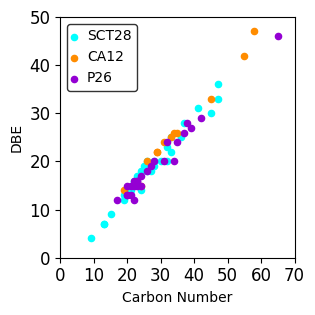

In [37]:
SCT28=[]
CA12=[]
P26=[]
for key in smiles.keys():
    if('SCT' in key):
        SCT28.append(key)
    if('CA' in key):
        CA12.append(key)
    if('P' in key):
        P26.append(key)

fig, ax = plt.subplots(figsize=(3.25, 3.25))
ax.scatter([nC[key] for key in SCT28],[DBE[key] for key in SCT28], c='cyan', label='SCT28', s=20)
ax.scatter([nC[key] for key in CA12],[DBE[key] for key in CA12], c='darkorange', label='CA12', s=20)
ax.scatter([nC[key] for key in P26],[DBE[key] for key in P26], c='darkviolet', label='P26', s=20)

# Set x and y ticks
x_ticks = [0, 10, 20, 30, 40, 50, 60, 70]
plt.xticks(x_ticks, labels=[f'{int(tick)}' for tick in x_ticks], fontsize=12)
y_ticks = [50, 40, 30, 20, 10, 0]
plt.yticks(y_ticks, labels=[f'{int(tick)}' for tick in y_ticks], fontsize=12)

# Add legend and labels
plt.legend(loc='upper left', edgecolor = 'black', handlelength = 0.2)
#plt.title("DBE vs Carbon Number", fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.xlabel('Carbon Number')
plt.ylabel('DBE')
plt.tight_layout()

plt.show()

### <u>LogP Figures

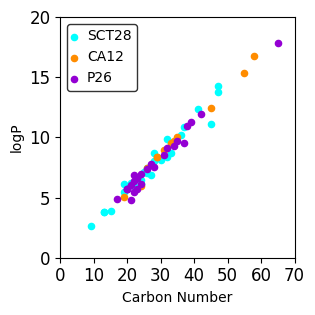

In [39]:
fig, ax = plt.subplots(figsize=(3.25, 3.25))
ax.scatter([nC[key] for key in SCT28],[logP[key] for key in SCT28], c='cyan', label='SCT28', s=20)
ax.scatter([nC[key] for key in CA12],[logP[key] for key in CA12], c='darkorange', label='CA12', s=20)
ax.scatter([nC[key] for key in P26],[logP[key] for key in P26], c='darkviolet', label='P26', s=20)

# Set x and y ticks
x_ticks = [0, 10, 20, 30, 40, 50, 60, 70]
plt.xticks(x_ticks, labels=[f'{int(tick)}' for tick in x_ticks], fontsize=12)
y_ticks = [20, 15, 10, 5, 0]
plt.yticks(y_ticks, labels=[f'{int(tick)}' for tick in y_ticks], fontsize=12)

# Add legend and labels
plt.legend(loc='upper left', edgecolor = 'black', handlelength = 0.2)
#plt.title("DBE vs Carbon Number", fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.xlabel('Carbon Number')
plt.ylabel('logP')
plt.tight_layout()

plt.show()